## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
pd.set_option("display.max_columns", 100)
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("CrabAgePrediction.csv")

## E.D.A.

In [3]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
data.tail()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6
3892,I,0.7875,0.6125,0.2125,4.068153,1.502523,1.346601,1.417475,8


In [5]:
data.sample(5)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
682,F,1.450,1.1500,0.3750,28.221927,12.161936,6.010094,7.370870,19
3020,M,1.700,1.2875,0.4250,45.685219,23.856104,8.674947,11.198052,11
81,F,1.550,1.2500,0.4375,32.488527,13.522711,6.520385,11.056305,13
1272,M,1.475,1.1625,0.3875,32.205032,14.869313,7.413394,7.796112,11
2402,F,1.600,1.3125,0.4375,39.179009,18.313777,8.830869,10.489315,9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [7]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [8]:
data.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


<AxesSubplot:>

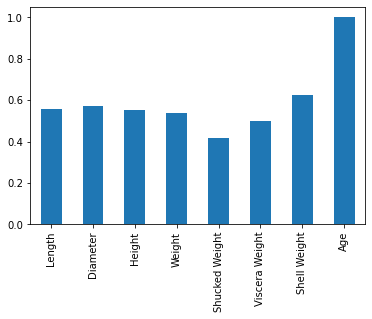

In [9]:
data.corr()["Age"].plot(kind = "bar")

In [10]:
data.describe()[1:].style.background_gradient()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [12]:
y = data["Age"]
x = data.drop("Age", axis = 1)

In [13]:
x = pd.get_dummies(x, drop_first = True)

In [32]:
def regression(x, y):
    lr = LinearRegression()
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    #pf = PolynomialFeatures()
    sv = SVR(kernel = "rbf")   # 'linear', 'poly', 'rbf', 'sigmoid'
    dt = DecisionTreeRegressor(criterion = "squared_error") # "squared_error", "friedman_mse", "absolute_error"
    rf = RandomForestRegressor()
    
    models = [lr, r, l, e, sv, dt, rf]
    model_names = ["Linear_Regression", "Ridge", "Lasso", "ElasticNet", 
                   "Support_Vector", "Decision_Tree", "Random_Forest"]
    r2 = []
    mse = []
    result_df = pd.DataFrame(columns = ["R2_Score", "Mean_Squared_Error"], index = model_names)
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    scale1 = StandardScaler()
    scale2 = MinMaxScaler()
    x_train = scale1.fit_transform(x_train)
    x_test = scale1.fit_transform(x_test)
    # x_train = scale2.fit_transform(x_train)
    # x_test = scale2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        mse.append(mean_squared_error(y_true, y_pred) ** 0.5)
        
    result_df["R2_Score"] = r2
    result_df["Mean_Squared_Error"] = mse
    
    return result_df.sort_values("R2_Score", ascending = False)    

In [33]:
regression(x, y)

,R2_Score,Mean_Squared_Error
Support_Vector,53.002211,2.125143
Linear_Regression,51.169352,2.166186
Ridge,51.077628,2.168219
Random_Forest,50.737265,2.175749
ElasticNet,33.030842,2.536804
Lasso,28.542002,2.620444
Decision_Tree,7.050297,2.988639


## Outlier

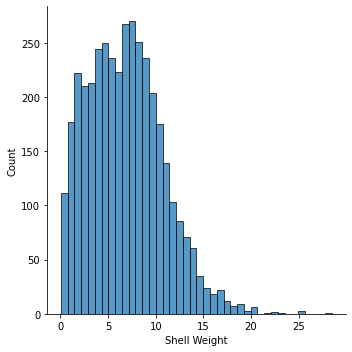

In [34]:
sbn.displot(data["Shell Weight"]);

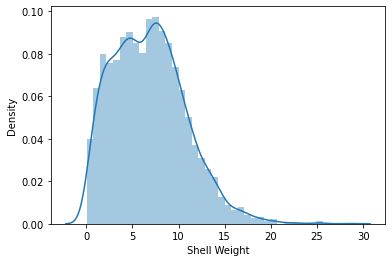

In [35]:
sbn.distplot(data["Shell Weight"]);

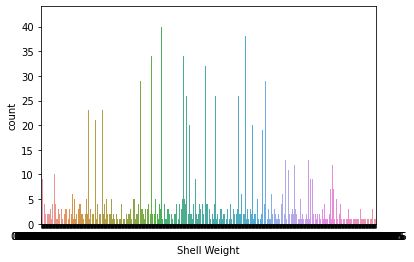

In [36]:
sbn.countplot(data["Shell Weight"]);

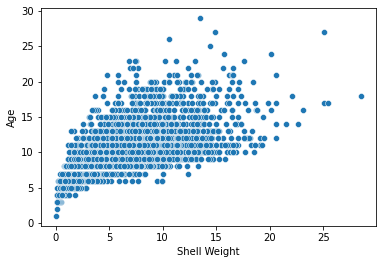

In [37]:
sbn.scatterplot(x = "Shell Weight", y = "Age", data = data);

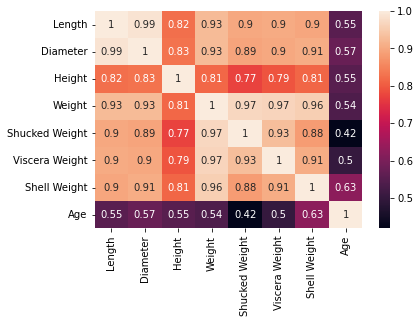

In [38]:
sbn.heatmap(data.corr(), annot = True);

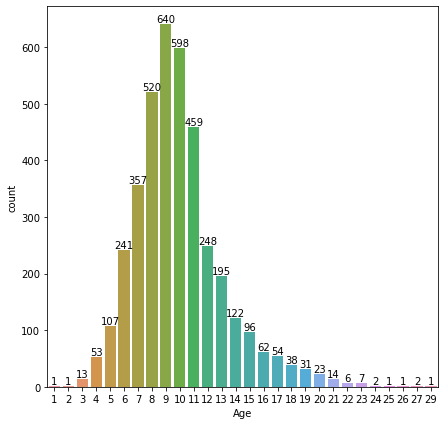

In [39]:
plt.figure(figsize = (7, 7))
ax = sbn.countplot(x = data["Age"])
ax.bar_label(ax.containers[0]);

In [40]:
Q1 = data["Shell Weight"].quantile(0.25)
Q3 = data["Shell Weight"].quantile(0.75)
IQR = Q3- Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Shell Weight"] > lower_limit) | (data["Shell Weight"] < upper_limit)]

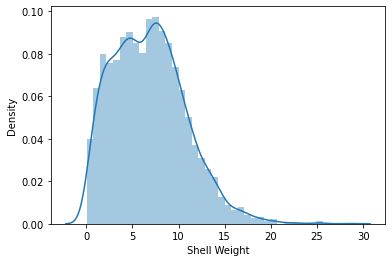

In [41]:
sbn.distplot(data["Shell Weight"]);

## Shell Weight kolonundan outlier'i atinca r2_score az arttı.

In [49]:
y1 = data["Age"]
x1 = data.drop("Age", axis = 1)
x1 = pd.get_dummies(x1, drop_first = True)
regression(x1, y1)

,R2_Score,Mean_Squared_Error
Support_Vector,53.002211,2.125143
Linear_Regression,51.169352,2.166186
Ridge,51.077628,2.168219
Random_Forest,50.773694,2.174944
ElasticNet,33.030842,2.536804
Lasso,28.542002,2.620444
Decision_Tree,11.431944,2.917347


## Length column'dan outlier'i atip sonuçları karşılaştıralım.

In [50]:
data.corr()["Age"]

Length            0.554973
Diameter          0.573844
Height            0.551956
Weight            0.538819
Shucked Weight    0.418760
Viscera Weight    0.501328
Shell Weight      0.625195
Age               1.000000
Name: Age, dtype: float64

In [51]:
Q1 = data["Length"].quantile(0.25)
Q3 = data["Length"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
data = data[(data["Length"] > lower_limit) | (data["Length"] < upper_limit)]

In [52]:
y2 = data["Age"]
x2 = data.drop("Age", axis = 1)
x2 = pd.get_dummies(x2, drop_first = True)
regression(x2, y2)

,R2_Score,Mean_Squared_Error
Support_Vector,53.002211,2.125143
Linear_Regression,51.169352,2.166186
Ridge,51.077628,2.168219
Random_Forest,50.537250,2.180161
ElasticNet,33.030842,2.536804
Lasso,28.542002,2.620444
Decision_Tree,10.817445,2.927450
